<img align="top" alt="GIF" height="500px" width="1000px" src="https://media.giphy.com/media/L1R1tvI9svkIWwpVYr/giphy.gif" />

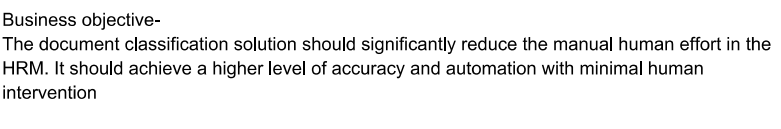

# Import Libraries

#### start

In [ ]:
!pip install textract

restart runtime

In [ ]:
!pip install regex

In [ ]:
!sudo apt-get install antiword

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
antiword is already the newest version (0.37-16).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [ ]:
import re

In [ ]:
import zipfile

In [ ]:
import os

In [ ]:
import textract

In [ ]:
import pandas as pd

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize

### Importing and extracting Datas from zipfile

In [ ]:
zip_filepath="/content/Resumes.zip"

In [ ]:
with zipfile.ZipFile(zip_filepath,'r') as zip_read:
    zip_read.extractall("/content/")
    zip_extract=zip_read.namelist()

In [ ]:
zip_extract

['Resumes/React Developer_Haripriya.docx',
 'Resumes/React Developer_Naveen sadhu.docx',
 'Resumes/Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Resumes/Internship_Susovan Bag_Musquare Technologies.docx',
 'Resumes/Internship_Ravali_Musquare Technologies (1).docx',
 'Resumes/React Developer_Pragnya.docx',
 'Resumes/Reactjs Developer_M Lokesh.docx',
 'Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Resumes/Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Resumes/React Developer_Sarala Madasu-converted.docx',
 'Resumes/React Developer_Kamalakar Reddy.docx',
 'Resumes/React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Resumes/React JS Developer_AnjaniPriyadarshini.doc',
 'Resumes/React Developer_Vinay Reddy.doc',
 'Resumes/Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Resumes/Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Resumes/React Developer_Thirupathiamma.docx',
 'Resumes/React JS Develop

In [ ]:
len(zip_extract)

79

In [ ]:
dir='/content/rs'

### Extracting each files using user defined funtion readresume and ceating a dataframe called df

In [ ]:
def readresume(directory):
    file_path = []
    category = []
    file_content = []
    file_name = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path.append(os.path.join(root, file))
            folder_name = os.path.basename(root)

            if folder_name=="Resumes":
               folder_name="React_JS"

            elif re.search(r'\bresumes\b',folder_name,flags=re.IGNORECASE):
               folder_name = folder_name.replace("resumes", "").strip()

            category.append(folder_name)
            file_name.append(file)

            # Extract the file content using textract
            content = textract.process(os.path.join(root, file)).decode('utf-8')
            file_content.append(content)

    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_name,
        'Content': file_content,
        'JobPost': category
    })

    return df


In [ ]:
Data=readresume("/content/Resumes")

In [ ]:
Data

,File,Content,JobPost
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React_JS
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS
2,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS
3,Reactjs Developer_M Lokesh.docx,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React_JS
4,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS
...,...,...,...
74,Priyanka L.doc,\n SQL S...,SQL Developer Lightning insight
75,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
76,premsai.docx,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight
77,Tatikonda Kiran Kumar.doc,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning insight


In [ ]:
import matplotlib.pyplot as plt

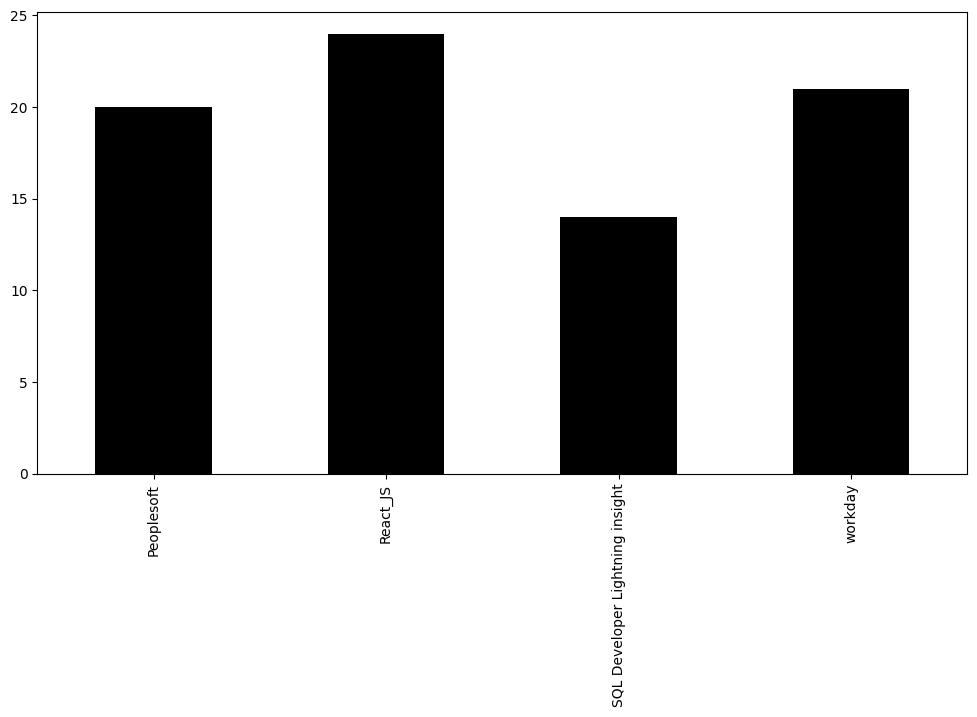

In [ ]:
Data['JobPost'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6),color='k')
plt.show()

Finally extracted files data and its category as its folder name but see the Reactjs people category as Resumes so we will remove all resume word from Category and will add only folder name as category and Since react files was outside of subfolders,not in any folder so ..Vivek K...let us change to ReactJs

<img align="top" alt="GIF" height="500px" width="500px" src="https://media0.giphy.com/media/CrFLL3CnRpw5ddlBMm/giphy.gif?cid=ecf05e47imwhm4yhyq1at2tpntundhvh0dxjoxk22yezlfe8&ep=v1_gifs_search&rid=giphy.gif&ct=g" />

In [ ]:
Data.duplicated().sum()

0

In [ ]:
CopyData=Data.copy()

### EDA

##### Data Cleaning

Let us clean data by removing unwanted characters and can extract required data from cleaned data set.Ok let's Start then....

##### Tokenisation of Data

If text contains multiple sentences or paragraphs, it's better to use a tokenizer that can handle those cases appropriately.So we will use Tweet tokenizer.


In the context of text processing, leading refers to the characters or whitespace at the beginning of a string, while trailing refers to the characters or whitespace at the end of a string.So we will remove these leading and trailing characters and we will remove empty strings.

In [ ]:
from nltk import word_tokenize

In [ ]:
def Cleaned(text):
    tokens = word_tokenize(text)
    details = [Text.strip() for Text in tokens]
    details = [Text for Text in details if Text]
    details = ' '.join(details)
    return details

In [ ]:
for index, row in CopyData.iterrows():
    content = row['Content']
    processed_text = Cleaned(content)
    CopyData.at[index, 'ProcessedText'] = processed_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React_JS,Ranga Gaganam Professional Summary : Professio...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi..."
2,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...
3,Reactjs Developer_M Lokesh.docx,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React_JS,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
4,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...
...,...,...,...,...
74,Priyanka L.doc,\n SQL S...,SQL Developer Lightning insight,SQL SERVER DEVELOPER Priyanka L Professional s...
75,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight,ANIL KUMAR MADDUKURI SQL & MSBI Developer Summ...
76,premsai.docx,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight,SQL DEVELOPER Name : - Bandi prem sai Career O...
77,Tatikonda Kiran Kumar.doc,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning insight,Career objective A rewarding opportunity in a ...


Ohkkkkkkk Now letus go for tweet tokenizer for some better process can use the tokenisation used above also but we will use different now.

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
def tknzr(details):
  tknzr = TweetTokenizer(strip_handles=True)
  tokens = tknzr.tokenize(details)
  Text = ' '.join(tokens)
  return Text

In [ ]:
for index, row in CopyData.iterrows():
    content = row['ProcessedText']
    processed_text = tknzr(content)
    CopyData.at[index, 'ProcessedText'] = processed_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React_JS,Ranga Gaganam Professional Summary : Professio...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi..."
2,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...
3,Reactjs Developer_M Lokesh.docx,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React_JS,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
4,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...
...,...,...,...,...
74,Priyanka L.doc,\n SQL S...,SQL Developer Lightning insight,SQL SERVER DEVELOPER Priyanka L Professional s...
75,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight,ANIL KUMAR MADDUKURI SQL & MSBI Developer Summ...
76,premsai.docx,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight,SQL DEVELOPER Name : - Bandi prem sai Career O...
77,Tatikonda Kiran Kumar.doc,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning insight,Career objective A rewarding opportunity in a ...


###### Extarct Url from Dtails and add to DataFrame for later use if they add their kaggle Git link it will be usefull later to analyse it.

In [ ]:
def extract_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    urls = re.findall(url_pattern, text)
    return urls

In [ ]:
for index, row in CopyData.iterrows():
    content = row['Content']
    processed_text = extract_urls(content)  # Extract URLs from the text
    processed_text_str = ', '.join(processed_text)  # Convert the list to a string
    CopyData.at[index, 'Url'] = processed_text_str

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React_JS,Ranga Gaganam Professional Summary : Professio...,
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",
2,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,
3,Reactjs Developer_M Lokesh.docx,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React_JS,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...,
4,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,
...,...,...,...,...,...
74,Priyanka L.doc,\n SQL S...,SQL Developer Lightning insight,SQL SERVER DEVELOPER Priyanka L Professional s...,
75,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight,ANIL KUMAR MADDUKURI SQL & MSBI Developer Summ...,
76,premsai.docx,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight,SQL DEVELOPER Name : - Bandi prem sai Career O...,
77,Tatikonda Kiran Kumar.doc,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning insight,Career objective A rewarding opportunity in a ...,


### find phone numbers and remove it

In [ ]:
def findphone(text):
  phone_pattern = r'(\+\d{1,3}\s?\d{10})|(\b\d{10}\b)'
  phone_numbers = re.findall(phone_pattern, text)
  phone_numbers = [match[0] or match[1] for match in re.findall(phone_pattern, text)]
  text_without_phone=re.sub(phone_pattern, '', text)
  return phone_numbers,text_without_phone

In [ ]:
for index, row in CopyData.iterrows():
    data = row['ProcessedText']
    phone_numbers, text_without_phone = findphone(data)
    CopyData.at[index, 'phone'] = ', '.join(phone_numbers) if phone_numbers else ''
    CopyData.at[index, 'ProcessedText'] = text_without_phone

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React_JS,Ranga Gaganam Professional Summary : Professio...,,
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
2,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,
3,Reactjs Developer_M Lokesh.docx,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React_JS,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...,,
4,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
...,...,...,...,...,...,...
74,Priyanka L.doc,\n SQL S...,SQL Developer Lightning insight,SQL SERVER DEVELOPER Priyanka L Professional s...,,
75,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight,ANIL KUMAR MADDUKURI SQL & MSBI Developer Summ...,,
76,premsai.docx,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight,SQL DEVELOPER Name : - Bandi prem sai Career O...,,
77,Tatikonda Kiran Kumar.doc,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning insight,Career objective A rewarding opportunity in a ...,,


#### Removecertain patterns "@[\w]*" from details

In [ ]:
import string

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
import numpy as np

In [ ]:
CopyData['ProcessedText'] = np.vectorize(remove_pattern)(CopyData['ProcessedText'], "@[\w]*")
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React_JS,Ranga Gaganam Professional Summary : Professio...,,
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
2,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,
3,Reactjs Developer_M Lokesh.docx,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React_JS,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...,,
4,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
5,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React_JS,Pranish Sonone Career summary : Experience of ...,,
6,Reactjs Developer_M Lokesh Babu_Musquare Techn...,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React_JS,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...,,
7,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",
8,React Developer_Pragnya.docx,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React_JS,PRAGNYA PATTNAIK Expertise : Having around 2 y...,http://g2evolution.co.in/,
9,Reactjs Developer_Prabakaran_Musquare Technolo...,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React_JS,Name : M . Prabakaran Title : UI Developer PRO...,,


### Remove URL and words containing "http"

In [ ]:
CopyData['ProcessedText'] = CopyData['ProcessedText'].astype(str)
CopyData['ProcessedText'] = CopyData['ProcessedText'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

In [ ]:
clean=[]

In [ ]:
for index, row in CopyData.iterrows():
    no_links = [word for word in row.ProcessedText.split() if 'http' not in word]
    clean.append(' '.join(no_links))

In [ ]:
CopyData['ProcessedText'] = clean

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",
...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,


### Removing empty resume

In [ ]:
CopyData=CopyData[CopyData['ProcessedText']!='']

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",
...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,


### Remove Duplicated Resumes

In [ ]:
CopyData.drop_duplicates(subset=['ProcessedText'], keep=False)
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",
...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,


### Cleaning Data to pure form (Text strip)

In [ ]:
def cleandata(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    remove words containing numbers, handle contractions, and correct misspellings.'''

    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove special characters
    text = re.sub('⇨|:|•|!', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newlines
    text = re.sub('\n', '', text)

    # Remove tab
    text = text.replace('\t', ' ')

    # Remove extra white space
    text=re.sub('\s+', ' ', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    #Remove numeric and alpha numeric texts

    text = re.sub( r'[^A-Za-z]', ' ', text)

    return text

In [ ]:
for index, row in CopyData.iterrows():
    data=row['ProcessedText']
    text=cleandata(data)
    CopyData.at[index, 'CleanedText'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to brin...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika pr...
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...
...,...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,,murali professional summary having years of e...
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,,priyabrata hota career objective pursuing peop...
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,,classification internal classification interna...


### Removing Emojis and images if exist

In [ ]:
def remove_pictures_and_emojis(text):
    # Regular expression pattern to match pictures and emojis
    picture_emoji_pattern = r'[^\w\s,.!?]'
    text_without_pictures_emojis = re.sub(picture_emoji_pattern, '', text)  # Replaces pictures and emojis with an empty string
    return text_without_pictures_emojis

In [ ]:
for index, row in CopyData.iterrows():
    data=row['CleanedText']
    text=remove_pictures_and_emojis(data)
    CopyData.at[index, 'CleanedText'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to brin...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika pr...
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...
...,...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,,murali professional summary having years of e...
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,,priyabrata hota career objective pursuing peop...
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,,classification internal classification interna...


### Handle Contractions

Handle contractions: If your resume text contains contractions like "don't" or "can't," you can choose to either expand them ("do not," "cannot") or keep them as is, depending on your preference and the requirements of your analysis.

In [ ]:
#from textblob import TextBlob

In [ ]:
#def Contract(text):
    #corrected_text = TextBlob(text).correct()
    #return str(corrected_text)


In [ ]:
#for index, row in CopyData.iterrows():
   # data = row['CleanedText']
   # corrected_text = Contract(data)
   # CopyData.at[index, 'CleanedText'] = corrected_text

We will not try contractions because it is changing even persons name also so that part we will remove.

Correct common misspellings: Implementing a spell-checking mechanism can help identify and correct common misspellings in the resume text. This can improve the accuracy and quality of the cleaned text. But we will not do since it may change some name or other thing so by lemmitisation it will be solved .

Remove boilerplate text: In some cases, resumes may contain standardized or boilerplate text that appears across multiple resumes. You can identify and remove such text to focus more on the unique content of each resume

### Remove boilerplate text

In the context of resume classification, removing boilerplate text can be beneficial. Boilerplate text in resumes often includes standard sections such as contact information, education history, and job descriptions that are common across many resumes. These sections may not contribute significantly to the classification task since they don't contain unique information that distinguishes one resume from another.

By removing boilerplate text, you can focus on the content that is more specific and indicative of the candidate's skills, experience, and qualifications. This can help improve the accuracy and effectiveness of your resume classification model by reducing noise and irrelevant information.

In [ ]:
def remove_boilerplate(text):
    # Define patterns for common boilerplate sections
    boilerplate_patterns = [
        r'contact information:.*',
        r'adress:.*',
        r'mobile:*',
        r'hobbies:.*',
        r'email".*',
        r'Github:.*',
        r'Kaggle:.*'
    ]

    # Remove boilerplate sections from the text
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove extra whitespace and newlines
    text = re.sub('\s+', ' ', text).strip()

    return text

In [ ]:
for index, row in CopyData.iterrows():
    data = row['CleanedText']
    corrected_text = remove_boilerplate(data)
    CopyData.at[index, 'CleanedText'] = corrected_text

In [ ]:
 CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to bring...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...
...,...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,,murali professional summary having years of ex...
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,,priyabrata hota career objective pursuing peop...
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,,classification internal classification interna...


### Removing stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
cleaned=[]

In [ ]:
cleaned = []
for index, row in CopyData.iterrows():
    no_stopwords = [word for word in row.CleanedText.split() if word not in stopwords]
    cleaned.append(' '.join(no_stopwords))

CopyData['Clean'] = cleaned


In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to bring...,profile searching opportunity bring years expe...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...
...,...,...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,,murali professional summary having years of ex...,murali professional summary years experience p...
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,,classification internal classification interna...,classification internal classification interna...


### Tokenise

In [ ]:
CopyData['Token'] =CopyData['Clean'].apply(lambda x: nltk.word_tokenize(x))
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to bring...,profile searching opportunity bring years expe...,"[profile, searching, opportunity, bring, years..."
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...,"[sarala, madasu, sarala, madasu, sri, geethika..."
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...,"[kotani, durga, prasad, objective, aspirant, p..."
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s..."
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...,"[curriculum, vitae, anjani, priyadarshini, obj..."
5,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React_JS,SHAIK ABDUL SHARUK 2 years ’ Experience in Wip...,https://www.linkedin.com/in/sharuk-abdul-99b75...,,shaik abdul sharuk years experience in wipro c...,shaik abdul sharuk years experience wipro care...,"[shaik, abdul, sharuk, years, experience, wipr..."
6,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa..."
7,Reactjs Developer_MD Khizaruddin Rauf _Musquar...,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React_JS,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...,,,md khizaruddin rauf experience currently worki...,md khizaruddin rauf experience currently worki...,"[md, khizaruddin, rauf, experience, currently,..."
8,React Developer_Naveen sadhu.docx,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React_JS,Naveen Sadhu Title : software developer Locati...,,,naveen sadhu title software developer location...,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
9,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React_JS,Pranish Sonone Career summary : Experience of ...,,,pranish sonone career summary experience of ye...,pranish sonone career summary experience years...,"[pranish, sonone, career, summary, experience,..."


### Lemmitisation

###### Data Text processing (converting to lowe case ,stemming/Lemmetizing and removing stopwords)

Letus consider Lemmatisation from spacy and can apply spacy pipepline.
we first load the English language model using spacy.load('en_core_web_sm'). Then, for each input X, we convert it to lowercase and pass it to the nlp object, which performs tokenization, part-of-speech tagging, and lemmatization. We iterate over the tokens in the processed document, excluding any stopwords, and retrieve the lemma for each token using token.lemma_. Finally, we join the lemmatized tokens back into a single string.So we will remove stop words using NLTK and other pipeline process using Spacy.

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

2023-07-19 06:23:49.455510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 06:23:51.531207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

In [ ]:
for index,row in CopyData.iterrows():
  text=row['Clean']
  lemtext=lemmatize_text(text)
  text=' '.join(lemtext)
  CopyData.at[index,'Lemtext']=text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to bring...,profile searching opportunity bring years expe...,"[profile, searching, opportunity, bring, years...",profile search opportunity bring year experien...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...,"[sarala, madasu, sarala, madasu, sri, geethika...",sarala madasu sarala madasu sri geethika prest...
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...,"[kotani, durga, prasad, objective, aspirant, p...",kotani durga prasad objective aspirant positio...
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s...",kanumuru deepak reddy career objective secure ...
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...,"[curriculum, vitae, anjani, priyadarshini, obj...",curriculum vitae anjani priyadarshini objectiv...
...,...,...,...,...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,,murali professional summary having years of ex...,murali professional summary years experience p...,"[murali, professional, summary, years, experie...",murali professional summary year experience pe...
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...,"[peoplesoft, admin, peoplesoft, dba, ganesh, a...",peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...,"[priyabrata, hota, career, objective, pursuing...",priyabrata hota career objective pursue people...
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,,classification internal classification interna...,classification internal classification interna...,"[classification, internal, classification, int...",classification internal classification interna...


### Let us apply the data to spacy pipeline

Actually the spacy pipeline below no need just for extra practice we are used here

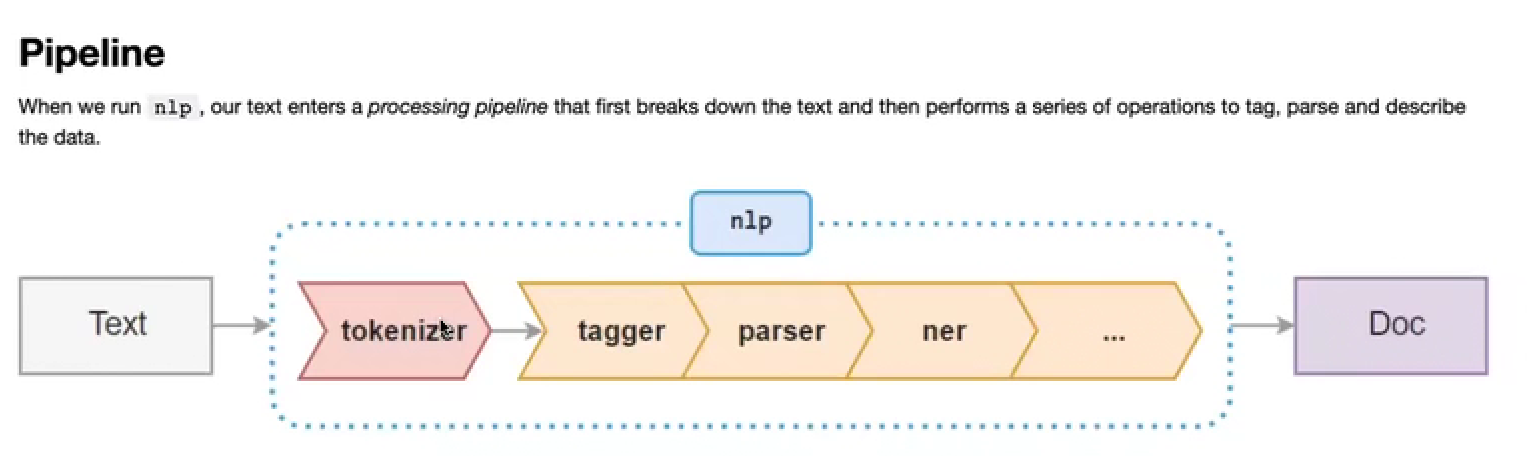

 Lemtext is our fine data let us try with spacy pipelines for final process.

In [ ]:
for index, row in CopyData.iterrows():
    lemtext = row['Lemtext']
    doc = nlp(lemtext)
    text = doc.text  # Get the processed text as a string
    CopyData.at[index, 'FinalData'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext,FinalData
0,React Developer_PavasGoswami.doc,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React_JS,[ pic ] PROFILE Searching for the opportunity ...,,,profile searching for the opportunity to bring...,profile searching opportunity bring years expe...,"[profile, searching, opportunity, bring, years...",profile search opportunity bring year experien...,profile search opportunity bring year experien...
1,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...,"[sarala, madasu, sarala, madasu, sri, geethika...",sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...
2,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...,"[kotani, durga, prasad, objective, aspirant, p...",kotani durga prasad objective aspirant positio...,kotani durga prasad objective aspirant positio...
3,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s...",kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
4,React JS Developer_AnjaniPriyadarshini.doc,\n CURRICULUM VIT...,React_JS,CURRICULUM VITAE | Anjani Priyadarshini | Obje...,"https://www.quaqua.com/, https://m.quaqua.com/",,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...,"[curriculum, vitae, anjani, priyadarshini, obj...",curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...
...,...,...,...,...,...,...,...,...,...,...,...
74,Peoplesoft FSCM_Murali.docx,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,Murali PROFESSIONAL SUMMARY Having 4.6 years o...,,,murali professional summary having years of ex...,murali professional summary years experience p...,"[murali, professional, summary, years, experie...",murali professional summary year experience pe...,murali professional summary year experience pe...
75,PeopleSoft DBA_Ganesh Alladi.doc,\n PeopleSoft Admin/Peo...,Peoplesoft,PeopleSoft Admin / PeopleSoft DBA Ganesh Allad...,,,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...,"[peoplesoft, admin, peoplesoft, dba, ganesh, a...",peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft FSCM_PriyabrataHota.docx,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...,,,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...,"[priyabrata, hota, career, objective, pursuing...",priyabrata hota career objective pursue people...,priyabrata hota career objective pursue people...
77,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,Peoplesoft,Classification : Internal Classification : Int...,,,classification internal classification interna...,classification internal classification interna...,"[classification, internal, classification, int...",classification internal classification interna...,classification internal classification interna...


### Ngrams

See if we use BBOW,BOW it cannot understand the actual meaning of sentence since it will not take care of order of words so let us go fo Ngrams(2 or 3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Finaltext=np.array(CopyData['FinalData'])

In [ ]:
cv=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv.fit_transform(Finaltext)

In [ ]:
bow_matrix_ngram

<79x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 29406 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names_out()

array(['ability', 'ability work', 'ability work team', ...,
       'year professional', 'year professional experience',
       'year workday'], dtype=object)

In [ ]:

sum_words = bow_matrix_ngram.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_frequency)
df.columns = ['Words', 'Count']

df[0:10]

,Words,Count
0,experience,637
1,application,531
2,report,530
3,use,503
4,work,489
5,server,485
6,peoplesoft,453
7,workday,427
8,project,387
9,create,382


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

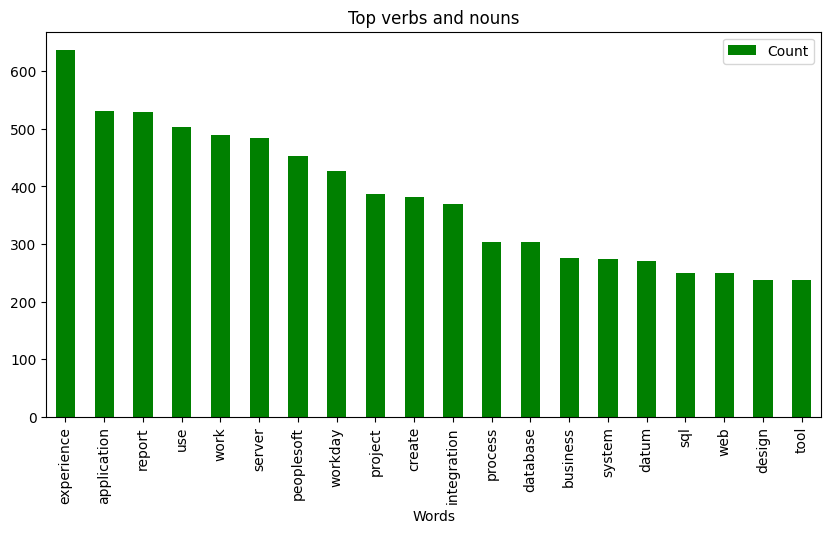

In [ ]:
df[0:20].plot.bar(x='Words', figsize=(10,5), title='Top verbs and nouns',color='green')

In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[100:200])

['application create multiple' 'application database' 'application design'
 'application design many' 'application designer'
 'application designer application' 'application designer datum'
 'application development' 'application engine' 'application engine load'
 'application engine people' 'application engine program'
 'application issue' 'application issue problem' 'application level'
 'application management' 'application management task'
 'application package' 'application package peoplesoft'
 'application peoplesoft' 'application server' 'application server cache'
 'application server domain' 'application server process'
 'application server web' 'application upgrade' 'application use'
 'application version' 'application work' 'apply' 'apply application'
 'apply bundle' 'apply environment' 'apply environment maintain'
 'apply fix' 'apply fix patch' 'apply patch' 'apply patch bundle'
 'apply patch fix' 'apply pum' 'apply pum image' 'apply tax'
 'apply tax update' 'approach' 'appro

In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
Countvector=pd.DataFrame(bow_matrix_ngram.toarray(),columns=cv.get_feature_names_out())


In [ ]:
Countvector

,ability,ability work,ability work team,absence,absence management,academic,accenture,acceptance,access,access people,...,year,year experience,year experience peoplesoft,year experience workday,year extensive,year month,year pass,year professional,year professional experience,year workday
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,2,1,...,3,2,1,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
Data=new_df = CopyData[['JobPost', 'FinalData']]

In [ ]:
Data

,JobPost,FinalData
0,React_JS,profile search opportunity bring year experien...
1,React_JS,sarala madasu sarala madasu sri geethika prest...
2,React_JS,kotani durga prasad objective aspirant positio...
3,React_JS,kanumuru deepak reddy career objective secure ...
4,React_JS,curriculum vitae anjani priyadarshini objectiv...
...,...,...
74,Peoplesoft,murali professional summary year experience pe...
75,Peoplesoft,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft,priyabrata hota career objective pursue people...
77,Peoplesoft,classification internal classification interna...


### WordCloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [ ]:
value_counts = CopyData['JobPost'].value_counts()

In [ ]:
value_counts

React_JS                           24
workday                            21
Peoplesoft                         20
SQL Developer Lightning insight    14
Name: JobPost, dtype: int64

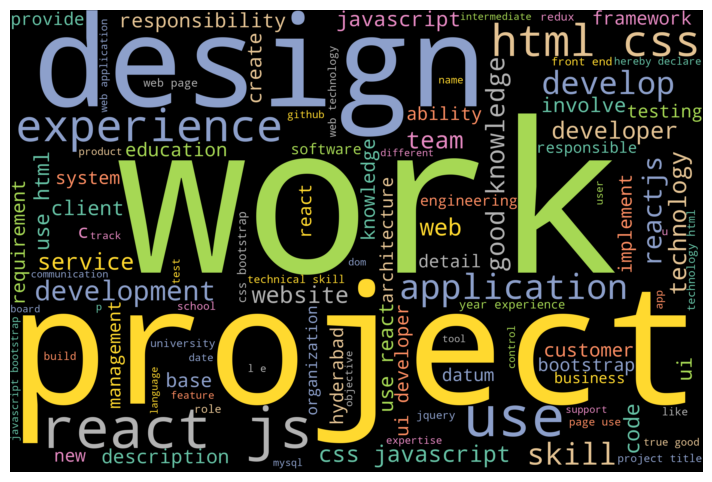

In [ ]:
react_js_data = Data[Data['JobPost'] == 'React_JS']  # Filter rows where JobPost is 'React_JS'
words = np.array(react_js_data['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

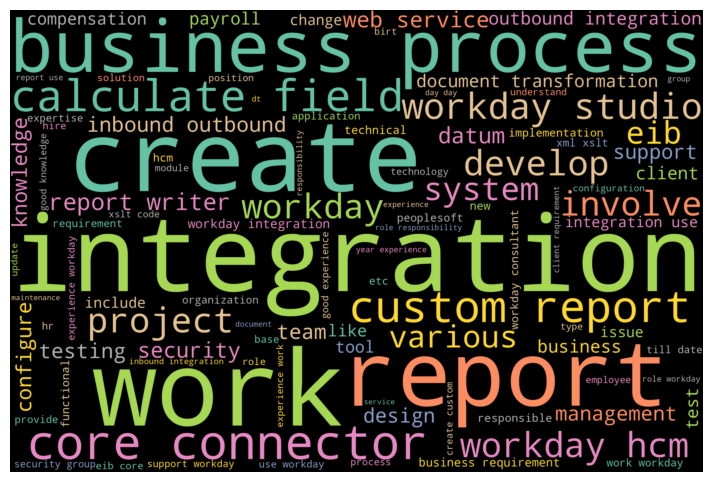

In [ ]:
workday = Data[Data['JobPost'] == 'workday']  # Filter rows where JobPost is 'React_JS'
words = np.array(workday['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

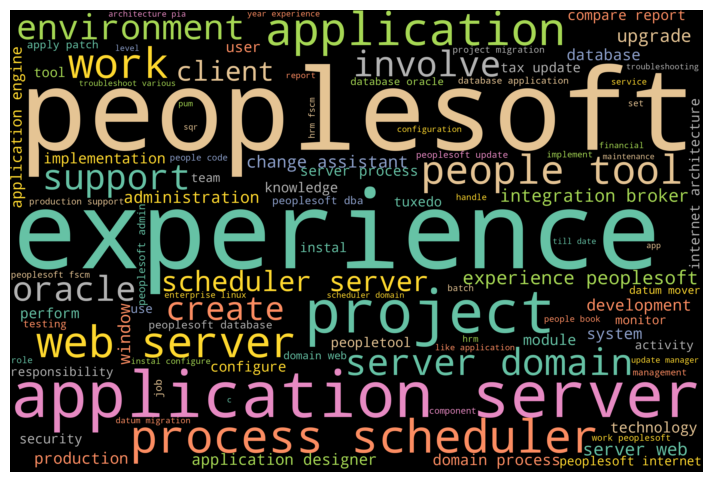

In [ ]:
Peoplesoft = Data[Data['JobPost'] == 'Peoplesoft']  # Filter rows where JobPost is 'React_JS'
words = np.array(Peoplesoft['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

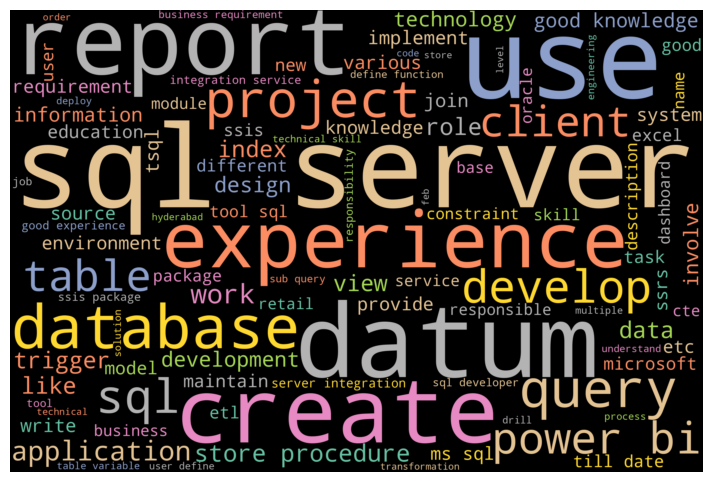

In [ ]:
SQL = Data[Data['JobPost'] == 'SQL Developer Lightning insight']  # Filter rows where JobPost is 'React_JS'
words = np.array(SQL['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### TF-IDF VECTORISER

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
b=np.array(Data["FinalData"])

In [ ]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'profile': 2701,
 'search': 3098,
 'opportunity': 2395,
 'bring': 440,
 'year': 3937,
 'experience': 1233,
 'software': 3236,
 'develop': 959,
 'technology': 3504,
 'engineering': 1150,
 'designing': 947,
 'maintenance': 2028,
 'cater': 517,
 'specific': 3265,
 'need': 2274,
 'people': 2520,
 'critical': 800,
 'thinking': 3542,
 'problem': 2683,
 'solve': 3245,
 'leadership': 1922,
 'core': 758,
 'skill': 3213,
 'programming': 2708,
 'language': 1910,
 'java': 1812,
 'javascript': 1813,
 'mysql': 2237,
 'spring': 3282,
 'boot': 419,
 'reactjs': 2832,
 'angular': 161,
 'css': 817,
 'bootstrap': 421,
 'html': 1608,
 'personal': 2542,
 'detail': 951,
 'birth': 394,
 'date': 864,
 'apr': 209,
 'nationality': 2259,
 'indian': 1685,
 'address': 52,
 'nodejs': 2306,
 'microservice': 2133,
 'work': 3896,
 'engineer': 1149,
 'braino': 431,
 'service': 3133,
 'new': 2290,
 'delhi': 912,
 'mongodb': 2175,
 'aw': 295,
 'azure': 308,
 'feb': 1285,
 'present': 2648,
 'kailash': 1854,
 'nagar': 2240

In [ ]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,abdul,ability,able,abovementione,abreast,abs,absence,absent,abstract,abstraction,...,yonder,york,young,yrs,zealand,zenefit,zero,zerozilla,zone,zp
0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.023091,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.055570,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.0,0.000000,0.029737,0.02619,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.032552,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
75,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
76,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.05938,0.0,0.0,0.0
77,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


#### Pickle file creation for TF-IDF Vectorizer

In [ ]:
import pickle

In [ ]:
file_path = "vectorizer.pkl"

In [ ]:
with open(file_path, "wb") as f:
    pickle.dump(tv, f)

In [ ]:
print("TFIDFModel saved as a pickle file.")

TFIDFModel saved as a pickle file.


### Label Encoder

In [ ]:
Data

,JobPost,FinalData
0,React_JS,profile search opportunity bring year experien...
1,React_JS,sarala madasu sarala madasu sri geethika prest...
2,React_JS,kotani durga prasad objective aspirant positio...
3,React_JS,kanumuru deepak reddy career objective secure ...
4,React_JS,curriculum vitae anjani priyadarshini objectiv...
...,...,...
74,Peoplesoft,murali professional summary year experience pe...
75,Peoplesoft,peoplesoft admin peoplesoft dba ganesh alladi ...
76,Peoplesoft,priyabrata hota career objective pursue people...
77,Peoplesoft,classification internal classification interna...


In [ ]:
Data['JobPost'].unique()

array(['React_JS', 'workday', 'SQL Developer Lightning insight',
       'Peoplesoft'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label= LabelEncoder()
Data['JobPost']=label.fit_transform(Data['JobPost'])

<ipython-input-109-044c621d547a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['JobPost']=label.fit_transform(Data['JobPost'])


In [ ]:
Data['JobPost'].unique()

array([1, 3, 2, 0])

0----->Peoplesoft         

1----->React_JS

2----->SQL Developer Lightning insight

3----->workday                           

In [ ]:
Data

,JobPost,FinalData
0,1,profile search opportunity bring year experien...
1,1,sarala madasu sarala madasu sri geethika prest...
2,1,kotani durga prasad objective aspirant positio...
3,1,kanumuru deepak reddy career objective secure ...
4,1,curriculum vitae anjani priyadarshini objectiv...
...,...,...
74,0,murali professional summary year experience pe...
75,0,peoplesoft admin peoplesoft dba ganesh alladi ...
76,0,priyabrata hota career objective pursue people...
77,0,classification internal classification interna...


There are several advanced techniques and functions that can be beneficial for resume classification purposes. Here are a few commonly used techniques:

Word Embeddings: Word embeddings such as Word2Vec, GloVe, or fastText can capture the semantic meaning of words by representing them as dense vectors in a continuous space. These embeddings can be pre-trained on large corpora or fine-tuned on specific domain-specific data to enhance the representation of words in your resume classification task.

Text Vectorization: Instead of using simple word-based approaches, you can employ more advanced vectorization techniques such as TF-IDF (Term Frequency-Inverse Document Frequency), CountVectorizer, or TfidfVectorizer. These methods convert text data into numerical representations that can be used as input to machine learning models.

N-gram Modeling: N-gram modeling considers the contextual information of words by considering sequences of consecutive words. By including n-gram features, such as bi-grams or tri-grams, you can capture more context and potentially improve the performance of your classification models.

Named Entity Recognition (NER): NER techniques can identify and extract specific named entities from the resume text, such as names, organizations, locations, or job titles. This additional information can provide valuable features for classification or assist in structuring the resume data.

Deep Learning Models: Advanced deep learning models, such as recurrent neural networks (RNNs), long short-term memory (LSTM) networks, or transformers (e.g., BERT, GPT), have shown significant success in natural language processing tasks. These models can automatically learn intricate patterns and representations from text data, potentially improving the accuracy of resume classification.

### Train Test Split

Letus split our Data with text data and TFIDF vector too for testing because if we use Pipeline method as follows in upcoming steps we can do TF-IDF inside Pipeline only

In [ ]:
from sklearn.model_selection import train_test_split

By default, the train-test split in scikit-learn's train_test_split function is random. The percentage split between the training set and the test set can be controlled using the test_size parameter.

The test_size parameter specifies the proportion of the dataset that should be allocated for the test set. By default, it is set to 0.25, which means that 25% of the data will be used for testing, and the remaining 75% will be used for training.

Splitting Data DF

In [ ]:
XTrain_Data,XTest_Data,YTrain_Data,YTest_Data=train_test_split(Data['FinalData'],Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

Splitting TF-IDF VECTOR

In [ ]:
XTrain,XTest,YTrain,YTest=train_test_split(TFIDF,Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

But you can use either one above so if you are using saperately then use second one else if using pipeline use Firstone.

In [ ]:
print('Train & Test Split is:')
XTrain.shape, XTest.shape

Train & Test Split is:


((63, 3954), (16, 3954))

## Model Building

#### Model 1 logistic regression

Let us start with Logistics Regression

So let us do the Logistics Regression using a pipeline model....

In [ ]:
pip install pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRmodelpipeline=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression(random_state=42))])

In [ ]:
LRmodelpipeline.fit(XTrain_Data,YTrain_Data)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=42))])

In [ ]:
YTrue=LRmodelpipeline.predict(XTest_Data)

OHHHHH!!!!!!!!!! Vivek  so let us go for model performance by analysing classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
LR_Report=classification_report(YTrue,YTest_Data)

In [ ]:
print(LR_Report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
cmlr=confusion_matrix(YTrue,YTest)

In [ ]:
cmlr

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [ ]:
report=LR_Report

In [ ]:
lines = LR_Report.strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
lr_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", lr_f1_score)

Total F1-score: 1.0


The element in the first row and first column (4) represents the number of true positives (TP) for the first class.


The element in the second row and second column (5) represents the number of true positives (TP) for the second class.


The element in the third row and third column (3) represents the number of true positives (TP) for the third class.

The element in the fourth row and fourth column (4) represents the number of true positives (TP) for the fourth class.

In [ ]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual')

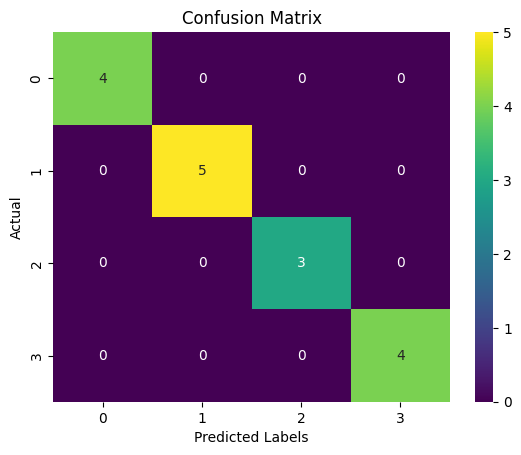

In [ ]:
sns.heatmap(cmlr,annot=True,cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")

from f1 score(classification_report) and confusion matrix this model is good

#### Model 2 Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Let us perform GCV for DT Classifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

since GCV does not have any random state we will set a random state by generating random seed

In [ ]:
import random

In [ ]:
np.random.seed(42)

In [ ]:
gcvdt=GridSearchCV(dt,param_grid,cv=5)

In [ ]:
gcvdt.fit(XTrain,YTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
gcvdt.best_params_,gcvdt.best_score_

({'criterion': 'gini',
  'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.9512820512820512)

In [ ]:
#best_model_dt=gcvdt.best_estimator_

In [ ]:
best_model_dt=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, min_samples_split=2)

In [ ]:
best_model_dt

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [ ]:
best_model_dt.fit(XTrain,YTrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16

[[3 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [1 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

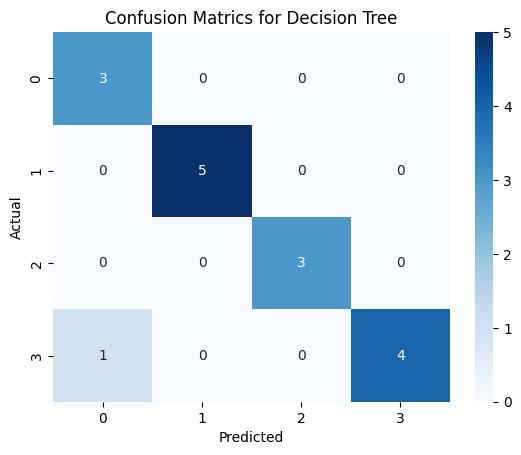

In [ ]:
YTruedt=best_model_dt.predict(XTest)
plt.title("Classification Report for Decision Tree")
DT_Report=classification_report(YTruedt,YTest)
print(DT_Report)
print("=====================================================================")
cmdt=confusion_matrix(YTruedt,YTest)
print(cmdt)
sns.heatmap(cmdt,annot=True,cmap='Blues')
plt.title("Confusion Matrics for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
lines = DT_Report.strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
dt_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", dt_f1_score)

Total F1-score: 0.94


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params={
    'n_estimators':[10,30,50],
    'max_depth':range(2,8),
    'min_samples_leaf':range(1,6),
    'min_samples_split':range(2,10)
}

Grid search cv for Randomforestclassifier(ensemble model)

In [ ]:
RF=RandomForestClassifier()

In [ ]:
np.random.seed(42)
gcvrf=GridSearchCV(estimator=RF,param_grid=params,cv=5)
gcvrf.fit(XTrain,YTrain)
print(gcvrf.best_params_,gcvrf.best_score_)
print("======================== ===== =====================")
#best_model_rf=gcvrf.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50} 0.9846153846153847
======================== ===== =====================


In [ ]:
best_model_rf=RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50)

In [ ]:
best_model_rf.fit(XTrain,YTrain)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=50)

Classification report for Random forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

============= ======= =======================
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

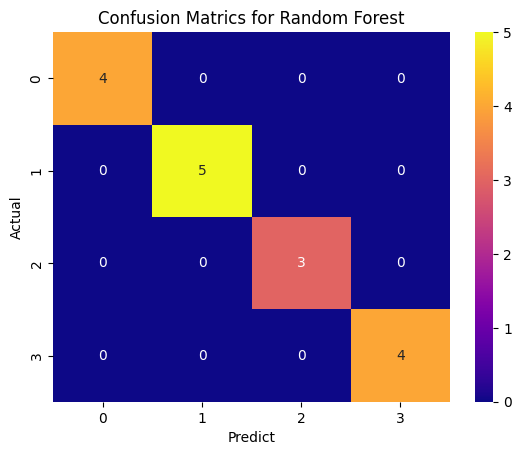

In [ ]:
Ytruerf=best_model_rf.predict(XTest)
print("Classification report for Random forest")
print(classification_report(Ytruerf,YTest))
print("============= ======= =======================")
cmrf=confusion_matrix(Ytruerf,YTest)
print(cmrf)
sns.heatmap(cmrf,annot=True,cmap='plasma')
plt.title("Confusion Matrics for Random Forest")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruerf,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
rf_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", rf_f1_score)

Total F1-score: 1.0


#### XGBOOST

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
params={'learning_rate':[0.1,0.001,0.001],
        'max_depth':range(2,10),
        'n_estimators':[100,200,300]}

In [ ]:
xgb=xgb.XGBClassifier()

creating random variable to generate random seed for same o/p in all re run condition to
avoid different o/p or model parameters.

In [ ]:
np.random.seed(42)
gcvxgb=GridSearchCV(estimator=xgb,param_grid=params,cv=5)

In [ ]:
gcvxgb.fit(XTrain,YTrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.001, 0.001],
                         'max_depth': range(2, 10),
                         'n_estimators': [100, 200, 300]})

In [ ]:
gcvxgb.best_params_,gcvxgb.best_score_

({'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100},
 0.9525641025641025)

In [ ]:
#best_model_xgb=gcvxgb.best_estimator_

In [ ]:
from xgboost import XGBClassifier

In [ ]:
best_model_xgb = XGBClassifier(learning_rate=0.001, max_depth=2, n_estimators=100)

In [ ]:
best_model_xgb.fit(XTrain,YTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Classification report for XGBoost
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16

============= ======= =======================
[[3 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [1 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

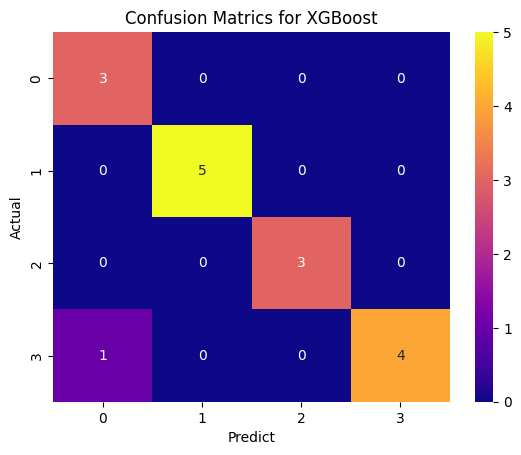

In [ ]:
Ytruexgb=best_model_xgb.predict(XTest)
print("Classification report for XGBoost")
print(classification_report(Ytruexgb,YTest))
print("============= ======= =======================")
cmxgb=confusion_matrix(Ytruexgb,YTest)
print(cmxgb)
sns.heatmap(cmxgb,annot=True,cmap='plasma')
plt.title("Confusion Matrics for XGBoost")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruexgb,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
xgb_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", xgb_f1_score)

Total F1-score: 0.94


#### ADABOOST Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
params={'learning_rate':[0.001,0.01,0.1],
               'n_estimators':[100,150,200,300]}

creating random variable to generate random seed for same o/p in all re run condition to
avoid different o/p or model parameters.

In [ ]:
ADA=AdaBoostClassifier()
np.random.seed(42)
gcvada=GridSearchCV(estimator=ADA,param_grid=params,cv=5)
gcvada.fit(XTrain,YTrain)
print(gcvada.best_params_,gcvada.best_score_)
print("======================== ===== =====================")
#best_model_ada=gcvada.best_estimator_

{'learning_rate': 0.001, 'n_estimators': 300} 0.9512820512820515
======================== ===== =====================


In [ ]:
best_model_ada=AdaBoostClassifier(learning_rate=0.001, n_estimators=300)

Classification report for AdaBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.92      0.96      0.93        16
weighted avg       0.96      0.94      0.94        16

============= ======= =======================
[[4 0 0 0]
 [0 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

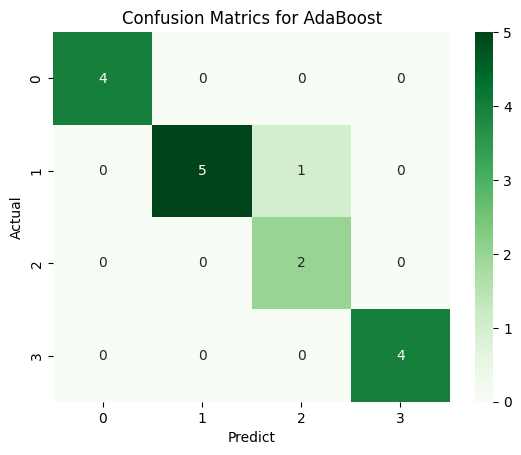

In [ ]:
best_model_ada.fit(XTrain,YTrain)
Ytrueada=best_model_ada.predict(XTest)
print("Classification report for AdaBoost")
print(classification_report(Ytrueada,YTest))
print("============= ======= =======================")
cmada=confusion_matrix(Ytrueada,YTest)
print(cmada)
sns.heatmap(cmada,annot=True,cmap='Greens')
plt.title("Confusion Matrics for AdaBoost")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytrueada,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
ada_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", ada_f1_score)

Total F1-score: 0.94


#### SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
svm=SVC()

In [ ]:
params={'C':[0.1,1,10],
        'kernel':['linear','rbf'],
        'gamma':[0.1,1,10]}

In [ ]:
random.seed(42)
gcvsvm=GridSearchCV(estimator=svm,param_grid=params,cv=5)
gcvsvm.fit(XTrain,YTrain)
gcvsvm.best_params_,gcvsvm.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, 0.9846153846153847)

In [ ]:
best_model_svm=SVC(C= 1, gamma= 0.1, kernel='linear')

Classification report for SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

============= ======= =======================
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

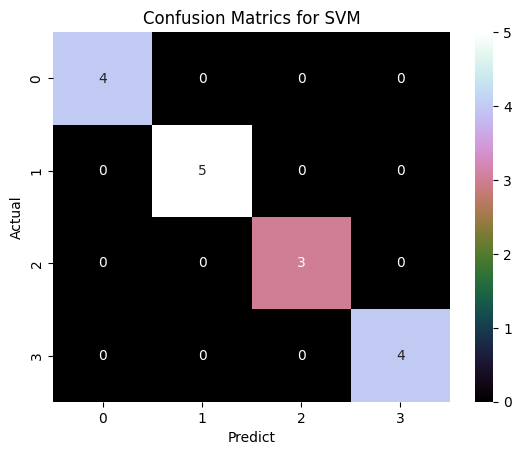

In [ ]:
#best_model_svm=gcvsvm.best_estimator_
best_model_svm.fit(XTrain,YTrain)
Ytruesvm=best_model_svm.predict(XTest)
print("Classification report for SVM")
print(classification_report(Ytruesvm,YTest))
print("============= ======= =======================")
cmsvm=confusion_matrix(Ytruesvm,YTest)
print(cmsvm)
sns.heatmap(cmsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for SVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruesvm,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
svm_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", svm_f1_score)

Total F1-score: 1.0


#### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvm=LinearSVC()

In [ ]:
params={'C':[0.1,1,10]}

In [ ]:
gcvlsvm=GridSearchCV(estimator=lsvm,param_grid=params,cv=5)

In [ ]:
gcvlsvm.fit(XTrain,YTrain)
gcvlsvm.best_params_,gcvlsvm.best_score_

({'C': 10}, 1.0)

In [ ]:
best_lsvm_model=LinearSVC(C=10)

Classification report for LinearSVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

============= ======= =======================
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

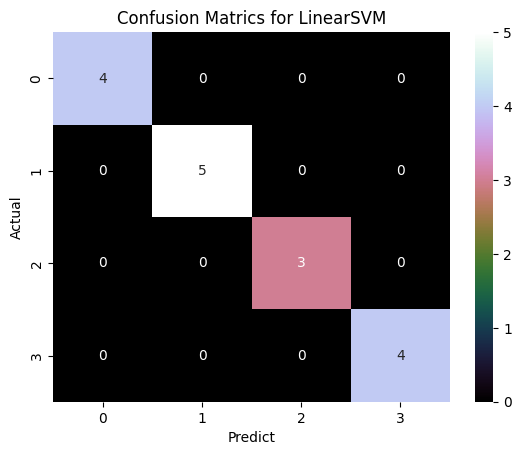

In [ ]:
#best_lsvm_model=gcvlsvm.best_estimator_
best_lsvm_model.fit(XTrain,YTrain)
Ytruelsvm=best_lsvm_model.predict(XTest)
print("Classification report for LinearSVM")
print(classification_report(Ytruelsvm,YTest))
print("============= ======= =======================")
cmlsvm=confusion_matrix(Ytruelsvm,YTest)
print(cmlsvm)
sns.heatmap(cmlsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for LinearSVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruelsvm,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
lsvm_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", lsvm_f1_score)

Total F1-score: 1.0


Ohk....the Linear SVC model shows perfect classification

### Neural Networks Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.preprocessing import sequence
#from keras.utils import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from keras.layers import Dropout

In [ ]:
# create model
def create_model():
    modelnn = Sequential()
    modelnn.add(Dense(4000, input_dim=3954, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(1000, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(4, kernel_initializer='random_uniform', activation='softmax'))

    adam=Adam(learning_rate=0.01)
    modelnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn

In [ ]:
modelnn = KerasClassifier(build_fn = create_model,verbose = 0)

<ipython-input-134-e6bc50b0df55>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn = KerasClassifier(build_fn = create_model,verbose = 0)


Softmax Activation: The softmax activation function is often used in multi-class classification problems. It normalizes the outputs of the neurons in the output layer to represent class probabilities. The softmax function ensures that the sum of the predicted probabilities across all classes is equal to 1, making it suitable for multi-class classification. It is typically used when the classes are mutually exclusive, meaning each input can only belong to one class.

#### Hyper parameter tuning for batch size and epochs

In [ ]:
import random

creating random variable to generate random seed for same o/p in all re run condition to
avoid different o/p or model parameters.

In [ ]:
np.random.seed(42)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,20]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
gridnn = GridSearchCV(estimator = modelnn,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_resultnn = gridnn.fit(XTrain.values,YTrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END .....batch_size=10, epochs=10;, score=0.846 total time=  24.0s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END .....batch_size=10, epochs=10;, score=0.846 total time=  22.5s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END .....batch_size=10, epochs=10;, score=0.923 total time=  23.3s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END .....batch_size=10, epochs=10;, score=1.000 total time=  42.9s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................


[CV 5/5; 1/6] END .....batch_size=10, epochs=10;, score=0.750 total time=  42.9s
[CV 1/5; 2/6] START batch_size=10, epochs=20....................................


[CV 1/5; 2/6] END .....batch_size=10, epochs=20;, score=0.769 total time=  37.2s
[CV 2/5; 2/6] START batch_size=10, epochs=20....................................
[CV 2/5; 2/6] END .....batch_size=10, epochs=20;, score=0.615 total time=  47.6s
[CV 3/5; 2/6] START batch_size=10, epochs=20....................................
[CV 3/5; 2/6] END .....batch_size=10, epochs=20;, score=0.846 total time=  44.0s
[CV 4/5; 2/6] START batch_size=10, epochs=20....................................
[CV 4/5; 2/6] END .....batch_size=10, epochs=20;, score=0.917 total time= 1.4min
[CV 5/5; 2/6] START batch_size=10, epochs=20....................................
[CV 5/5; 2/6] END .....batch_size=10, epochs=20;, score=1.000 total time= 1.4min
[CV 1/5; 3/6] START batch_size=20, epochs=10....................................
[CV 1/5; 3/6] END .....batch_size=20, epochs=10;, score=0.692 total time=  22.2s
[CV 2/5; 3/6] START batch_size=20, epochs=10....................................
[CV 2/5; 3/6] END .....batch

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn.best_score_,grid_resultnn.best_params_))
means = grid_resultnn.cv_results_['mean_test_score']
stds = grid_resultnn.cv_results_['std_test_score']
params = grid_resultnn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9230769276618958, using {'batch_size': 20, 'epochs': 10}
0.8730769276618957,0.08391316948212689 with: {'batch_size': 10, 'epochs': 10}
0.8294871926307679,0.131471212019859 with: {'batch_size': 10, 'epochs': 20}
0.9230769276618958,0.11916871124183447 with: {'batch_size': 20, 'epochs': 10}
0.7282051324844361,0.15199743510280975 with: {'batch_size': 20, 'epochs': 20}
0.8576923131942749,0.09389657948091969 with: {'batch_size': 40, 'epochs': 10}
0.8089743733406067,0.1292521297650228 with: {'batch_size': 40, 'epochs': 20}


In [ ]:
print('Best F1 Score:', grid_resultnn.best_score_)
print('Best Parameters:', grid_resultnn.best_params_)

Best F1 Score: 0.9230769276618958
Best Parameters: {'batch_size': 20, 'epochs': 10}


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
def create_model2(learning_rate, dropout_rate):
    modelnn2 = Sequential()
    modelnn2.add(Dense(4000, input_dim=3954, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(1000, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(4, kernel_initializer='random_uniform', activation='softmax'))

    adam = Adam(learning_rate=learning_rate)
    modelnn2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn2

modelnn2 = KerasClassifier(build_fn=create_model2, batch_size=20, epochs=10, verbose=0)

<ipython-input-144-40eed7c8af5b>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn2 = KerasClassifier(build_fn=create_model2, batch_size=20, epochs=10, verbose=0)


In [ ]:
learning_rate = [0.001,0.01]
dropout_rate = [0.1,0.2]
params=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [ ]:
np.random.seed(42)
gridnn2 = GridSearchCV(estimator = modelnn2,param_grid = params,cv = KFold(),verbose = 10)
grid_resultnn2 = gridnn2.fit(XTrain.values,YTrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 1/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=0.923 total time=  14.6s
[CV 2/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 2/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=0.923 total time=  22.7s
[CV 3/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 3/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=0.923 total time=  23.6s
[CV 4/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 4/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=0.583 total time=  23.6s
[CV 5/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 5/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=0.833 total time=  22.5s
[CV 1/5; 2/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn2.best_score_,grid_resultnn2.best_params_))
means2 = grid_resultnn2.cv_results_['mean_test_score']
stds2 = grid_resultnn2.cv_results_['std_test_score']
params2= grid_resultnn2.cv_results_['params']
for mean2, stdev2, param2 in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean2, stdev2, param2))

Best : 0.9051282048225403, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8371794819831848,0.13159618824719294 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.821794867515564,0.14267105973450184 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9051282048225403,0.0776038262755296 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9038461565971374,0.06013353942276671 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}


In [ ]:
print('Best F1 Score:', grid_resultnn2.best_score_)
print('Best Parameters:', grid_resultnn2.best_params_)

Best F1 Score: 0.9051282048225403
Best Parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001}


#### Hyper parameter tuning for activation function and initializer

In [ ]:
# Define the grid search parameters
activation_function = ['relu','tanh','linear']
init = ['uniform','normal','zero']
params3 = dict(activation_function = activation_function,init = init)

In [ ]:
def create_model3(activation_function, init):
    modelnn3 = Sequential()
    modelnn3.add(Dense(4000, input_dim=3954, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.2))
    modelnn3.add(Dense(2000, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.2))
    modelnn3.add(Dense(2000, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.2))
    modelnn3.add(Dense(1000, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.2))
    modelnn3.add(Dense(4, kernel_initializer=init, activation='softmax'))

    adam = Adam(learning_rate=0.001)
    modelnn3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn3

modelnn3 = KerasClassifier(build_fn=create_model3, batch_size=20, epochs=10, verbose=0)
np.random.seed(42)
gridnn3 = GridSearchCV(estimator=modelnn3, param_grid=params3, cv=KFold(), verbose=10)
grid_resultnn3 = gridnn3.fit(XTrain.values, YTrain)


<ipython-input-151-051711349211>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn3 = KerasClassifier(build_fn=create_model3, batch_size=20, epochs=10, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=relu, init=uniform......................
[CV 1/5; 1/9] END activation_function=relu, init=uniform;, score=0.923 total time=  14.4s
[CV 2/5; 1/9] START activation_function=relu, init=uniform......................
[CV 2/5; 1/9] END activation_function=relu, init=uniform;, score=1.000 total time=  22.4s
[CV 3/5; 1/9] START activation_function=relu, init=uniform......................
[CV 3/5; 1/9] END activation_function=relu, init=uniform;, score=0.923 total time=  22.5s
[CV 4/5; 1/9] START activation_function=relu, init=uniform......................
[CV 4/5; 1/9] END activation_function=relu, init=uniform;, score=0.917 total time=  14.1s
[CV 5/5; 1/9] START activation_function=relu, init=uniform......................
[CV 5/5; 1/9] END activation_function=relu, init=uniform;, score=0.750 total time=  13.3s
[CV 1/5; 2/9] START activation_function=relu, init=normal.......................
[CV 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_resultnn3.best_score_,grid_resultnn3.best_params_))
means3 = grid_resultnn3.cv_results_['mean_test_score']
stds3 = grid_resultnn3.cv_results_['std_test_score']
params3 = grid_resultnn3.cv_results_['params']
for mean3, stdev3, param3 in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean3, stdev3, param3))

Best : 0.9846153855323792, using {'activation_function': 'linear', 'init': 'normal'}
0.9025641083717346,0.08223137401499107 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9525641083717347,0.06222902585123099 with: {'activation_function': 'relu', 'init': 'normal'}
0.19102564454078674,0.041025638580322266 with: {'activation_function': 'relu', 'init': 'zero'}
0.9679487228393555,0.03930694176062705 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9525641083717347,0.038801907623464686 with: {'activation_function': 'tanh', 'init': 'normal'}
0.19102564454078674,0.041025638580322266 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8910256505012513,0.06094801979539134 with: {'activation_function': 'linear', 'init': 'uniform'}
0.9846153855323792,0.0307692289352417 with: {'activation_function': 'linear', 'init': 'normal'}
0.17435897886753082,0.0287819781827214 with: {'activation_function': 'linear', 'init': 'zero'}


In [ ]:
print('Best Parameters:', grid_resultnn3.best_params_)

Best Parameters: {'activation_function': 'linear', 'init': 'normal'}


#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
neuron1 = [4000,2000,1000]
neuron2 = [2000,1000]
neuron3 =[2000,1000]
neuron4=[500,1000,2000]
params4=dict(neuron1=neuron1,neuron2=neuron2,neuron3=neuron3,neuron4=neuron4)

In [ ]:
def create_model4(neuron1,neuron2,neuron3,neuron4):
    init = 'normal'
    activation_function='linear'
    modelnn4 = Sequential()
    modelnn4.add(Dense(neuron1, input_dim=3954, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.2))
    modelnn4.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.2))
    modelnn4.add(Dense(neuron3, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.2))
    modelnn4.add(Dense(neuron4, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.2))
    modelnn4.add(Dense(4, kernel_initializer=init, activation='softmax'))

    adam = Adam(learning_rate=0.001)
    modelnn4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn4

modelnn4 = KerasClassifier(build_fn=create_model4, batch_size=20, epochs=10, verbose=0)

np.random.seed(42)
gridnn4 = GridSearchCV(estimator=modelnn4, param_grid=params4, cv=KFold(), verbose=10)
grid_resultnn4 = gridnn4.fit(XTrain.values, YTrain)

<ipython-input-159-410ef3582776>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn4 = KerasClassifier(build_fn=create_model4, batch_size=20, epochs=10, verbose=0)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......
[CV 1/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=  23.1s
[CV 2/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......
[CV 2/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=  22.8s
[CV 3/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......
[CV 3/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=0.923 total time=  23.7s
[CV 4/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......
[CV 4/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=  23.2s
[CV 5/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......
[CV 5/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=  22.9s
[CV

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn4.best_score_,grid_resultnn4.best_params_))
means4 = grid_resultnn4.cv_results_['mean_test_score']
stds4 = grid_resultnn4.cv_results_['std_test_score']
params4 = grid_resultnn4.cv_results_['params']
for mean4, stdev4, param4 in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean4, stdev4, param4))

Best : 1.0, using {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 500}
0.9846153855323792,0.0307692289352417 with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 500}
0.8884615421295166,0.07961115272660779 with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 1000}
0.9358974456787109,0.05832980566625466 with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 2000}
0.9525641083717347,0.038801907623464686 with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 1000, 'neuron4': 500}
0.9692307710647583,0.03768445533511096 with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 1000, 'neuron4': 1000}
0.9679487228393555,0.03930694176062705 with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 1000, 'neuron4': 2000}
1.0,0.0 with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 500}
0.9692307710647583,0.03768445533511096 with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 1000}
0.921794879436493,0.0487179455004243

In [ ]:
print(grid_resultnn4.best_params_)

{'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 500}


#### Final NN Model

In [ ]:
from keras.utils import to_categorical

In [ ]:
YTrain_encoded = to_categorical(YTrain)
YTest_encoded = to_categorical(YTest)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

init = 'normal'
activation_function = 'linear'

modelnnfinal = Sequential()
modelnnfinal.add(Dense(4000, input_dim=3954, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.2))
modelnnfinal.add(Dense(1000, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.2))
modelnnfinal.add(Dense(2000, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.2))
modelnnfinal.add(Dense(500, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.2))
modelnnfinal.add(Dense(4, kernel_initializer=init, activation='softmax'))

adam = Adam(learning_rate=0.001)
modelnnfinal.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = modelnnfinal.fit(XTrain.values, YTrain_encoded,
                           epochs=40, batch_size=100, validation_data=(XTest.values, YTest_encoded))


Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 1.9294 - accuracy: 0.1111 - val_loss: 0.2969 - val_accuracy: 0.9375
Epoch 2/40
1/1 [==============================] - 0s 329ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.1044 - val_accuracy: 0.9375
Epoch 3/40
1/1 [==============================] - 0s 312ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 4/40
1/1 [==============================] - 0s 300ms/step - loss: 6.5614e-06 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/40
1/1 [==============================] - 0s 342ms/step - loss: 2.7815e-07 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/40
1/1 [==============================] - 0s 325ms/step - loss: 1.3245e-08 - accuracy: 1.0000 - val_loss: 5.0489e-04 - val_accuracy: 1.0000
Epoch 7/40
1/1 [==============================] - 0s 358ms/step - loss: 1.3245e-08 - accuracy: 1.0000 - val_loss: 3.0353e-04 - val_accuracy: 1.0000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


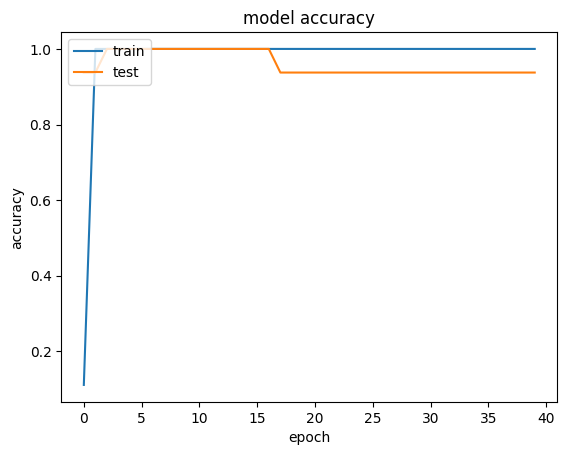

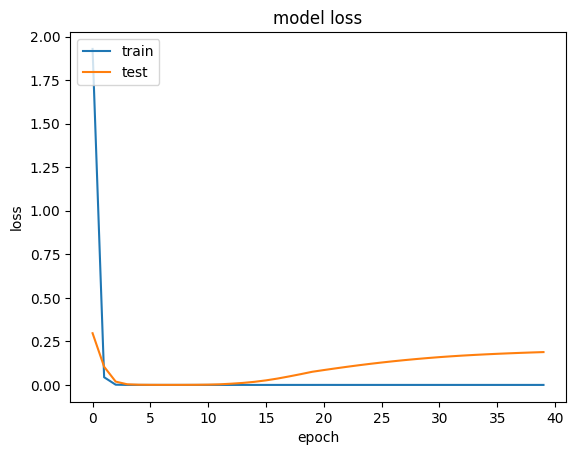

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modelnnfinal.predict(XTest.values)

1/1 [==============================] - 0s 177ms/step


array([[2.34476931e-32, 0.00000000e+00, 3.74983917e-29, 9.99999940e-01],
       [8.70281098e-31, 4.20959391e-38, 2.57503659e-26, 9.99999940e-01],
       [7.07043597e-28, 0.00000000e+00, 7.90344473e-30, 9.99999940e-01],
       [9.99999940e-01, 3.21116081e-32, 1.75219102e-23, 1.14210044e-31],
       [3.79694907e-30, 9.99999940e-01, 2.03943979e-26, 2.22549650e-30],
       [9.99999940e-01, 8.27815803e-23, 5.73794380e-11, 6.42592310e-22],
       [1.00790095e-22, 9.99999940e-01, 6.78325365e-12, 8.50352413e-21],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 0.00000000e+00],
       [1.35566099e-14, 9.99999821e-01, 1.56525346e-07, 8.36322792e-14],
       [2.30566109e-33, 8.34862043e-31, 9.99999940e-01, 2.51190974e-30],
       [6.28295496e-08, 4.89726067e-02, 9.51024771e-01, 2.65757353e-06],
       [2.88517419e-23, 4.91221914e-27, 9.99999940e-01, 6.50644677e-18],
       [1.39618409e-17, 9.99999940e-01, 1.82032705e-11, 2.82763979e-18],
       [9.99999940e-01, 7.72909246e-28, 1.39268302e

In [ ]:
predictionsnnfinal =np.argmax( modelnnfinal.predict(XTest.values),axis=1)

1/1 [==============================] - 0s 67ms/step


In [ ]:
predictionsnnfinal

array([3, 3, 3, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 3])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
neural_f1_score = f1_score(YTest.values, predictionsnnfinal, average='macro')

print("F1 score:", neural_f1_score)

F1 score: 0.9365079365079365


In [ ]:
print(classification_report(YTest.values, predictionsnnfinal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [ ]:
conf_matrix = confusion_matrix(YTest.values,predictionsnnfinal)

In [ ]:
import seaborn as sns

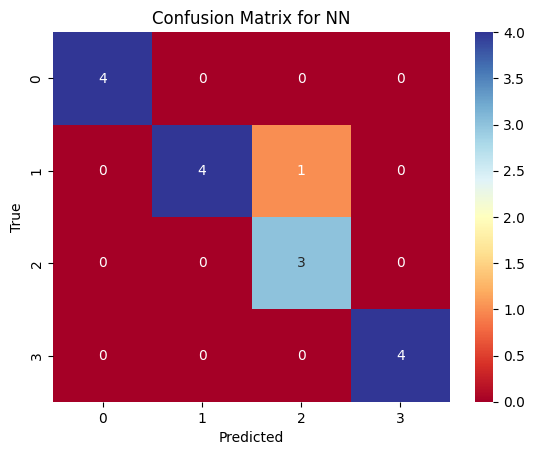

In [ ]:
sns.heatmap(conf_matrix, cmap='RdYlBu', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for NN')
plt.show()

Our Neural NETWORKS Models are  better like other models...

### MLP Classifier (ANN Model)

Multilayer perceptron (MLP) is a technique of feed-forward artificial neural networks using a back propagation learning method to classify the target variable used for supervised learning.

MLP’s can be applied to complex non-linear problems, and it also works well with large input data with a relatively faster performance. The algorithm tends to achieve the same accuracy ratio even with smaller data.

https://www.smarten.com/blog/multilayer-perceptron-classifier-enterprise-analysis/

In [ ]:
from sklearn.neural_network import MLPClassifier

np.random.seed(42)
# Create an instance of MLPClassifier
modelmlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

# Train the model on your training data
modelmlp.fit(XTrain,YTrain)

# Make predictions on new data
predictionsmlp = modelmlp.predict(XTest)

In [ ]:
predictionsmlp

array([3, 3, 3, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 3])

In [ ]:
# Make predictions on the test set
predictions = modelmlp.predict(XTest)

# Compute the F1 score
mlp_f1_score = f1_score(YTest, predictions, average='macro')

print("F1 score:", mlp_f1_score)


F1 score: 1.0


In [ ]:
predictionsmlp

array([3, 3, 3, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 3])

In [ ]:
conf_matrix = confusion_matrix(YTest_Data, predictionsmlp)
classreport_mlp=classification_report(YTest_Data, predictionsmlp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



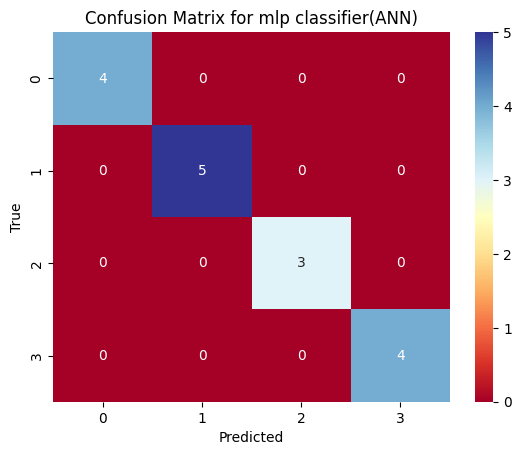

In [ ]:
sns.heatmap(conf_matrix, cmap='RdYlBu', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for mlp classifier(ANN)')
print(classreport_mlp)
plt.show()

### FASTTEXT MODEL

let us try with fasttext model

What is FastText?

FastText is an open-source, free library from Facebook AI Research(FAIR) for learning word embeddings and word classifications. This model allows creating unsupervised learning or supervised learning algorithm for obtaining vector representations for words. It also evaluates these models. FastText supports both CBOW and Skip-gram models.

Uses of FastText:

It is used for finding semantic similarities
It can also be used for text classification(ex: spam filtering).
It can train large datasets in minutes.

https://fasttext.cc/docs/en/python-module.html

https://www.geeksforgeeks.org/fasttext-working-and-implementation/

In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4479759 sha256=a95886000244743e938c3ebb000099349cebc3e73bf2de8670ca3d112c04e432
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
pip install --upgrade fasttext

In [ ]:
import fasttext

In [ ]:
# Prepare the training data in FastText format
train_data = [f'__label__{label} {text}' for text, label in zip(XTrain_Data, YTrain_Data)]
train_file = 'train.txt'

# Save the training data to a file
with open(train_file, 'w', encoding='utf-8') as f:
    for line in train_data:
        f.write(line + '\n')

# Train the FastText model
np.random.seed(42)
model = fasttext.train_supervised(input=train_file)

# Evaluate the model
result = model.test(train_file)
precision = result[1]
recall = result[2]
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Save the trained model
model.save_model("fasttext_model.bin")

# Load the saved model
loaded_model = fasttext.load_model("fasttext_model.bin")


Precision: 0.7936507936507936
Recall: 0.7936507936507936
F1-Score: 0.7936507936507936


In [ ]:
YTest_pred = [model.predict(text)[0][0].replace('__label__', '') for text in XTest_Data]

# Convert predicted labels to numeric values
YTest_pred = np.array(YTest_pred, dtype=int)

# Compute confusion matrix
confusion_mat = confusion_matrix(YTest_Data, YTest_pred)

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[4 0 0 0]
 [1 4 0 0]
 [0 0 0 3]
 [0 0 0 4]]


In [ ]:
YTest_pred

array([3, 3, 3, 0, 1, 0, 1, 3, 1, 3, 0, 3, 1, 0, 0, 3])

In [ ]:
YTest

38    3
35    3
30    3
65    0
11    1
69    0
20    1
48    2
1     1
53    2
0     1
56    2
22    1
66    0
73    0
31    3
Name: JobPost, dtype: int64

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         0
           3       1.00      0.57      0.73         7

    accuracy                           0.75        16
   macro avg       0.70      0.59      0.63        16
weighted avg       0.95      0.75      0.82        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(50.722222222222214, 0.5, 'Actual')

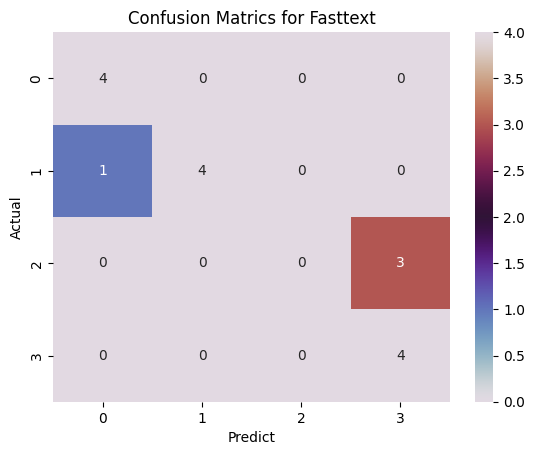

In [ ]:
print(classification_report(YTest_pred ,YTest))

sns.heatmap(confusion_mat,annot=True,cmap='twilight')
plt.title("Confusion Matrics for Fasttext")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(YTest_pred ,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
fasttext_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", fasttext_f1_score)

Total F1-score: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let us go for lazy predict to see what model will be best to automate the classifiers....but its an AI tool library to simply suggest us with accuracy and model f1 scores so with proper hyper parameter tuning we can get good models.Just we will go for lazy too to avoid

### Lazy predict for model evaluation predict

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
Lazyclf=LazyClassifier(predictions=True)
lazymodels,predictions=Lazyclf.fit(XTrain,XTest,YTrain,YTest)

100%|██████████| 29/29 [00:07<00:00,  4.05it/s]


In [ ]:
lazymodels

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.20
BaggingClassifier,1.00,1.00,None,1.00,0.20
SGDClassifier,1.00,1.00,None,1.00,0.14
RidgeClassifierCV,1.00,1.00,None,1.00,0.23
RidgeClassifier,1.00,1.00,None,1.00,0.17
RandomForestClassifier,1.00,1.00,None,1.00,0.35
Perceptron,1.00,1.00,None,1.00,0.15
LGBMClassifier,1.00,1.00,None,1.00,0.26
DecisionTreeClassifier,1.00,1.00,None,1.00,0.13


### Model Validation

In [ ]:
Modelvalidation=pd.DataFrame()
Modelvalidation['model']=['LogisticRegression','Decision Tree','Randomforest','XGBoost','ADABoost','svm','LinearSVC',
                          'Neural Networks','MLP Classifier','Fasttext']
Modelvalidation['f1_score']=[lr_f1_score,dt_f1_score,rf_f1_score,xgb_f1_score, ada_f1_score, svm_f1_score,lsvm_f1_score, neural_f1_score,
 mlp_f1_score,fasttext_f1_score]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(Modelvalidation, x="model", y="f1_score", barmode="group",color='f1_score')
fig.update_layout(title_text="F1 Score Comparison by Model")
fig.show()

### conclusion

So finally after analysing each model f1 score ,recall and confusion matrix we finalised LR,SVM RF etc. so finally we are going with SVM to deploy.

### Pickle file creation for deployment (streamlit)

WE FINALISE SVM AS OUR FINAL MODEL AND MAKE PICKLE FILE FOR THAT

In [ ]:
import pickle

In [ ]:
file_path = "model.pkl"

In [ ]:
with open(file_path, "wb") as f:
    pickle.dump(best_model_svm, f)

In [ ]:
print("Model saved as a pickle file.")

Model saved as a pickle file.


##Thank you